# Importing the libraries we need

In [361]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pyplot
from scipy import stats
import matplotlib.pyplot as plt

In [363]:
# Reading the data into the notebook
life = pd.read_csv("Life Expectancy Data.csv")

In [365]:
# Viewing the first 5 observations in the dataset
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [367]:
# Viewing the last five observations in the dataset
life.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [369]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# I observed that only the numerical columns in the dataset has missing values

In [372]:
# Viewing the statistical analysis of the dataset
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [374]:
life.columns = life.columns.str.strip()

# Handling the missing values in the dataset

In [377]:
# Handling the numerical column in the dataset
for column in life.select_dtypes(include = ["float64", "int64"]).columns:
    life[column] = life[column].fillna(life[column].mean())
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Checking for outliers in the dataset

In [380]:
for column in life.select_dtypes(include = ["float64", "int64"]).columns:
    z_scores = (life[column] - life[column].mean()) / life[column].std()
    outliers = life[np.abs(z_scores) > 3]
print(f" Outliers in {column}: \n {outliers} \n")

 Outliers in Schooling: 
                                Country  Year      Status  Life expectancy  \
74                 Antigua and Barbuda  2005  Developing        74.600000   
75                 Antigua and Barbuda  2004  Developing        74.400000   
76                 Antigua and Barbuda  2003  Developing        74.200000   
77                 Antigua and Barbuda  2002  Developing        74.000000   
78                 Antigua and Barbuda  2001  Developing        73.800000   
79                 Antigua and Barbuda  2000  Developing        73.600000   
335             Bosnia and Herzegovina  2000  Developing        74.600000   
849                  Equatorial Guinea  2000  Developing        52.700000   
1650                  Marshall Islands  2013  Developing        69.224932   
1714  Micronesia (Federated States of)  2000  Developing        67.000000   
1744                        Montenegro  2003  Developing        73.500000   
1745                        Montenegro  2002  Deve

{'whiskers': [<matplotlib.lines.Line2D at 0x1abb18c7550>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb18c5290>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb18b5b90>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb1a0c1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb17fa4d0>],
 'means': []}

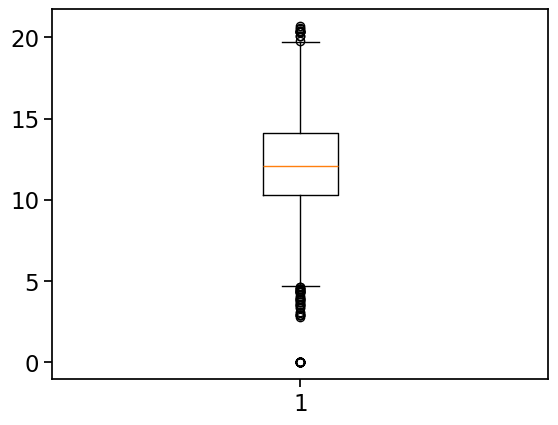

In [382]:
pyplot.boxplot(life["Schooling"])

# Handling the outliers checked using capping and flooring method

In [385]:
for column in life.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = life[column].quantile(0.25)
    Q3 = life[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    life[column] = np.where(life[column] > upper_bound, upper_bound, life[column])
    life[column] = np.where(life[column] < lower_bound, lower_bound, life[column])


In [387]:
# Checking to see if there is still outliers 
for column in life.select_dtypes(include = ['int64' , 'float64']).columns:
    z_scores = (life[column] - life[column].mean())/ life[column].std()
    outliers = life[np.abs(z_scores)>3]
    print(f"outliers in {column} : \n {outliers} \n")

outliers in Year : 
 Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns] 

outliers in Life expectancy : 
 Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years, thinness 5-9 years, Income composition of resources, Schooling]
Index: []

[0 rows x 22 columns] 

outliers in Adult Mortality : 
 Empty DataFrame
Columns: [Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total

# Checking to see if there are still outliers using visualization method

{'whiskers': [<matplotlib.lines.Line2D at 0x1abb1a4b850>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb1a1fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb1a4a850>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb1a1d910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb1a1fc10>],
 'means': []}

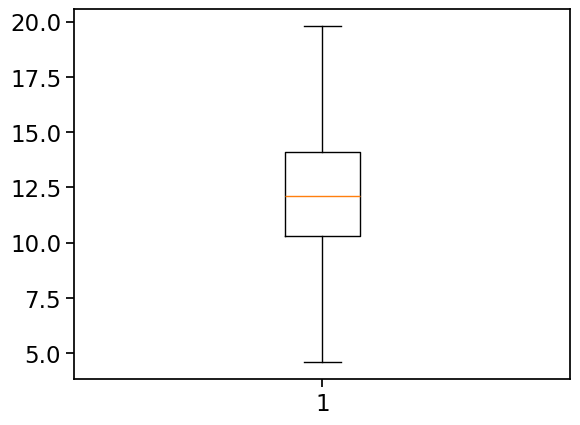

In [390]:
pyplot.boxplot(life["Schooling"])

# Checking and handling skewness in the dataset

In [393]:
numericaltraincolumns = life.select_dtypes(include=[np.number]).columns
skewness = life[numericaltraincolumns].apply(lambda x: stats.skew(x.dropna()))
skewed_columns = skewness[skewness > 0.5].index
# Apply log transformation to skewed columns
life[skewed_columns] = life[skewed_columns].apply(lambda x: np.log1p(x))

# Verify skewness reduction
print(life[skewed_columns].apply(lambda x: stats.skew(x.dropna())))

Adult Mortality          -1.175731
infant deaths             0.325474
Alcohol                  -0.354706
percentage expenditure   -0.352440
Measles                   0.173417
under-five deaths         0.294674
HIV/AIDS                  1.101232
GDP                      -0.702424
Population               -1.102800
thinness  1-19 years      0.032475
thinness 5-9 years       -0.001766
dtype: float64


# Visualizing the data 

In [396]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   float64
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

In [398]:
life.Country.unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Côte d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala'

C:\Users\STAIBOI\AppData\Local\Temp\ipykernel_11040\2535483125.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")


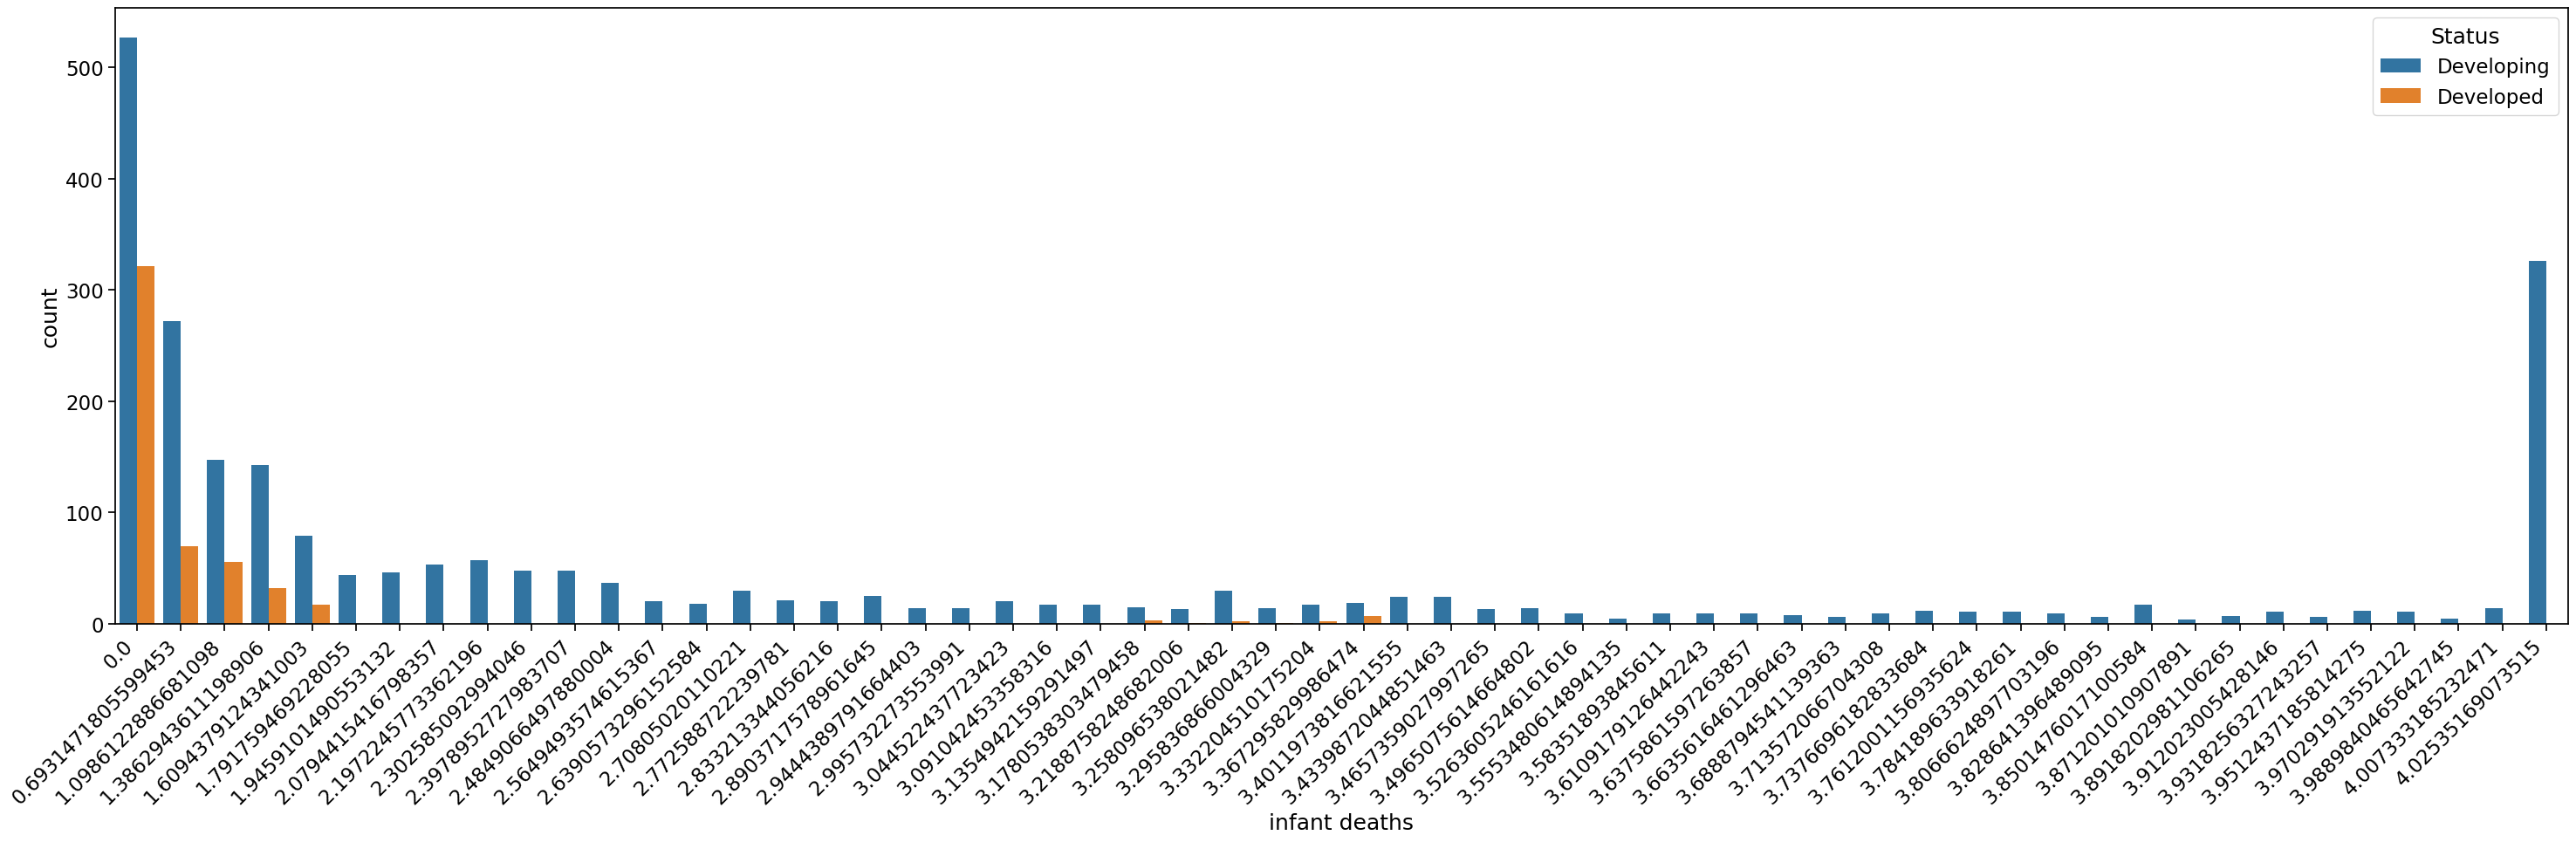

In [400]:
fig, ax = plt.subplots(figsize = (30, 10)) # Adjust the figure size 
sns.set_context("notebook", font_scale = 1.5)  # Adjust the font scale as needed
# plottting the countplot
sns.countplot(x = "infant deaths", hue = "Status", data = life, ax=ax)
# Rotating x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")
# Adjusting layout for better spacing
plt.tight_layout()
# Displaying the plot
plt.show()

# I observed that the developing countries have the highest number of infant deaths

C:\Users\STAIBOI\AppData\Local\Temp\ipykernel_11040\1184806739.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")


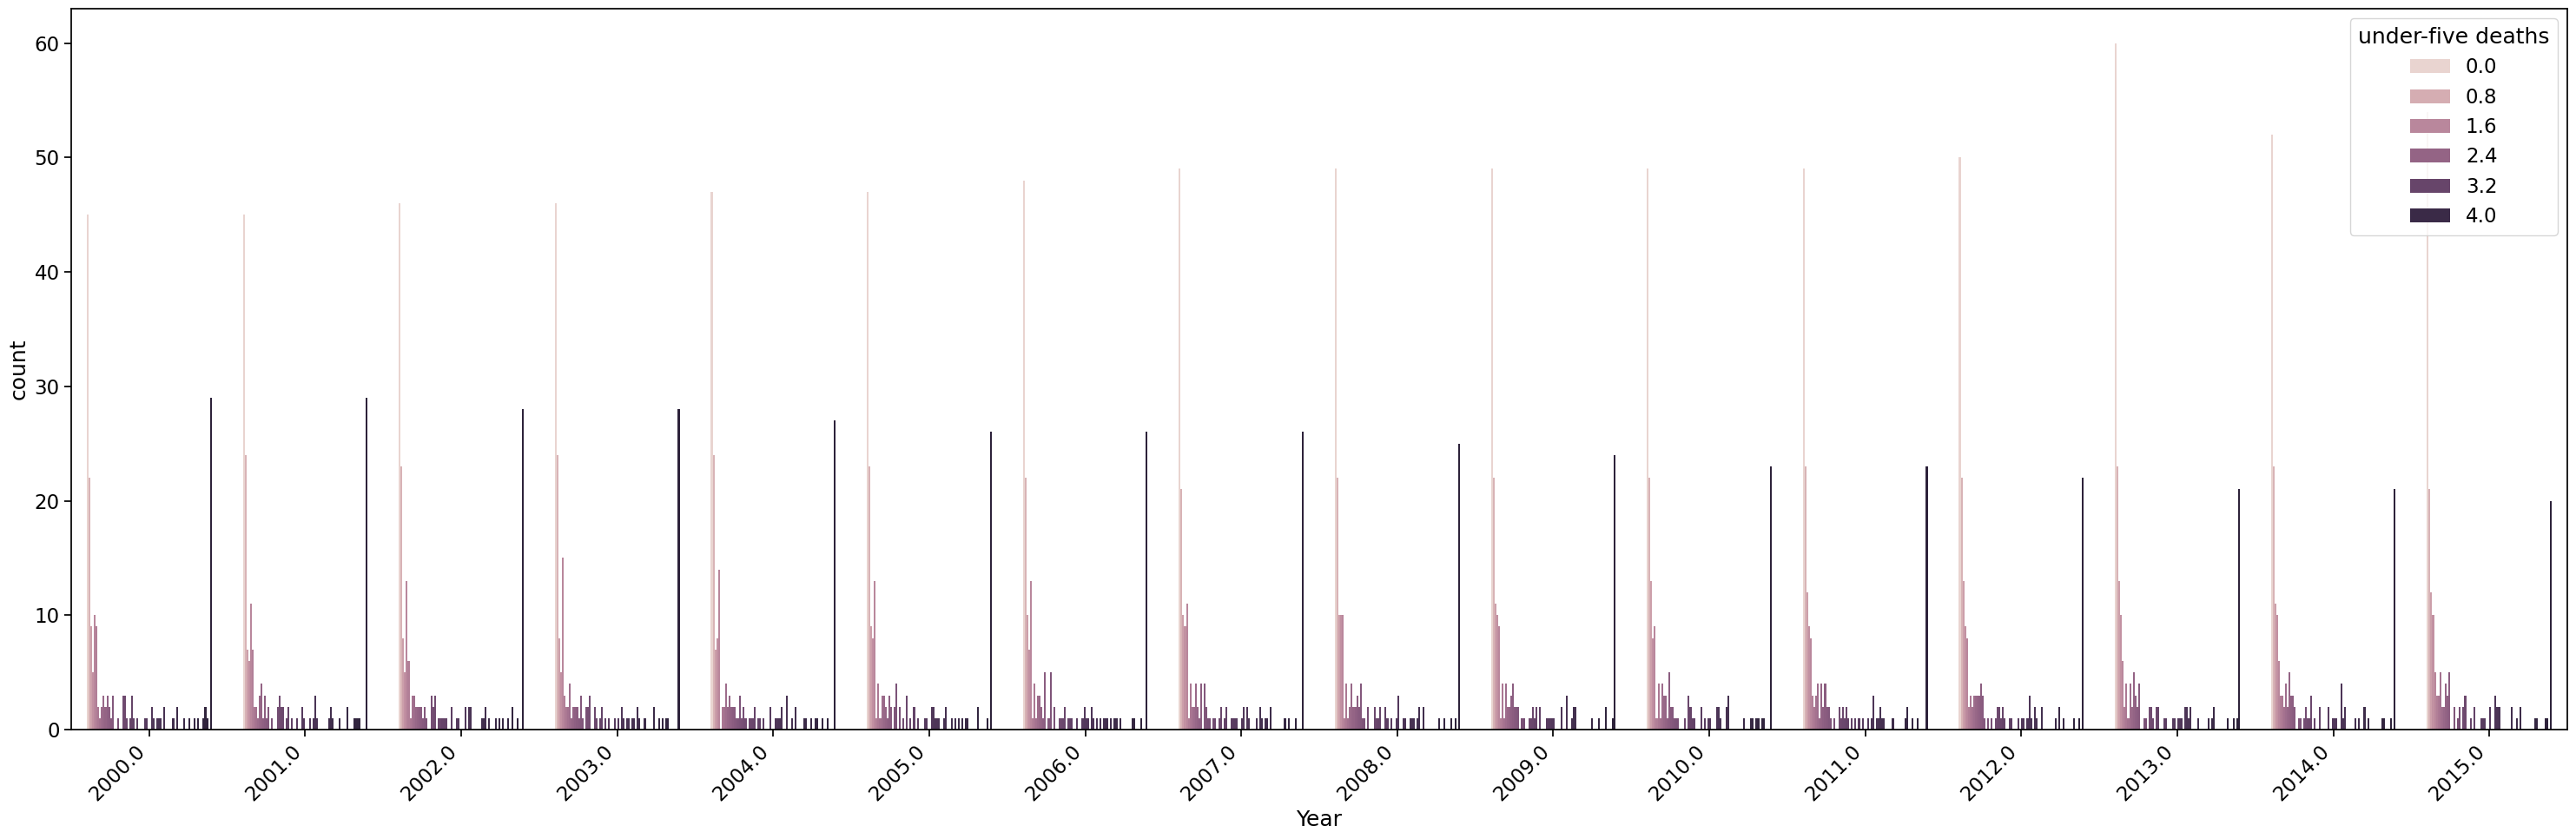

In [403]:
fig, ax = plt.subplots(figsize = (30, 10)) # Adjust the figure size 
sns.set_context("notebook", font_scale = 1.5)  # Adjust the font scale as needed
# plottting the countplot
sns.countplot(x = "Year", hue = "under-five deaths", data = life, ax=ax)
# Rotating x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = "right")
# Adjusting layout for better spacing
plt.tight_layout()
# Displaying the plot
plt.show()

# I observed age 0 and 4 have the highest deaths in the data set

# Performing correlation to see the relationship between each variable 

<function matplotlib.pyplot.show(close=None, block=None)>

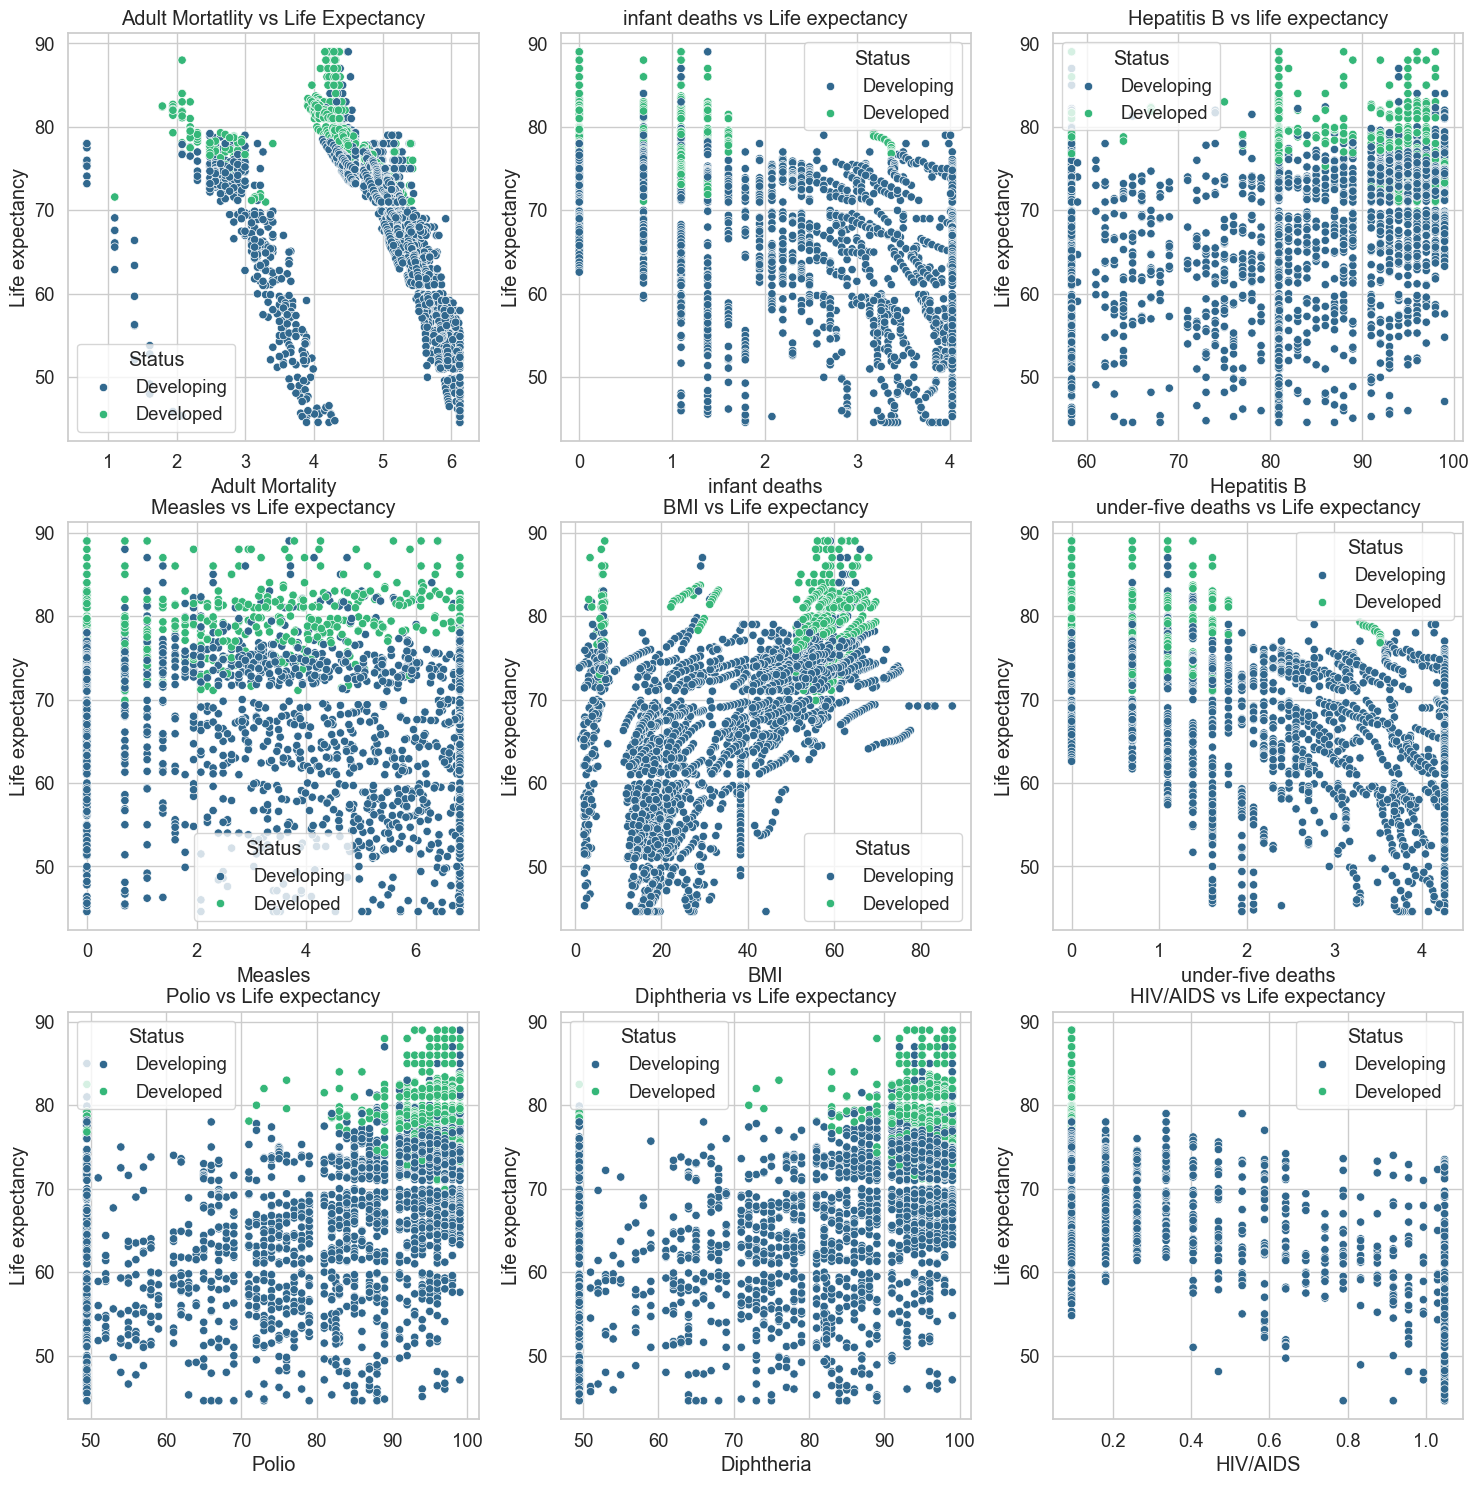

In [433]:
# set context and style for better aesthetics 
sns.set_context("notebook", font_scale = 1.2)
sns.set_style("whitegrid")

# list of columns to plot against life expectancy
columns = [
    "Adult Mortality", "infant deaths", "Hepatitis B", "Measles", "BMI",
    "under-five deaths", "Polio", "Diphtheria", "HIV/AIDS"
]

# Title for the subplot
titles = [
    "Adult Mortatlity vs Life Expectancy", "infant deaths vs Life expectancy",
    "Hepatitis B vs life expectancy", "Measles vs Life expectancy",
    "BMI vs Life expectancy", "under-five deaths vs Life expectancy",
    "Polio vs Life expectancy", "Diphtheria vs Life expectancy",
    "HIV/AIDS vs Life expectancy", 
]

# Create subplots for scatter plot
fig, axes = plt.subplots(3, 3, figsize = (18, 18))

for ax, column, title in zip(axes.flatten(), columns, titles):
    sns.scatterplot(x = column, y = "Life expectancy", data = life, hue = "Status", palette = "viridis", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel("Life expectancy")
plt.tight_layout
plt.show

# Observation
## Adult Mortality, infant deaths, Hepatitis B, Measles, BMI, under-five deaths, polio, diphtheria, HIV/AIDS are rampant in developing countries and little in the developed countries

<Axes: >

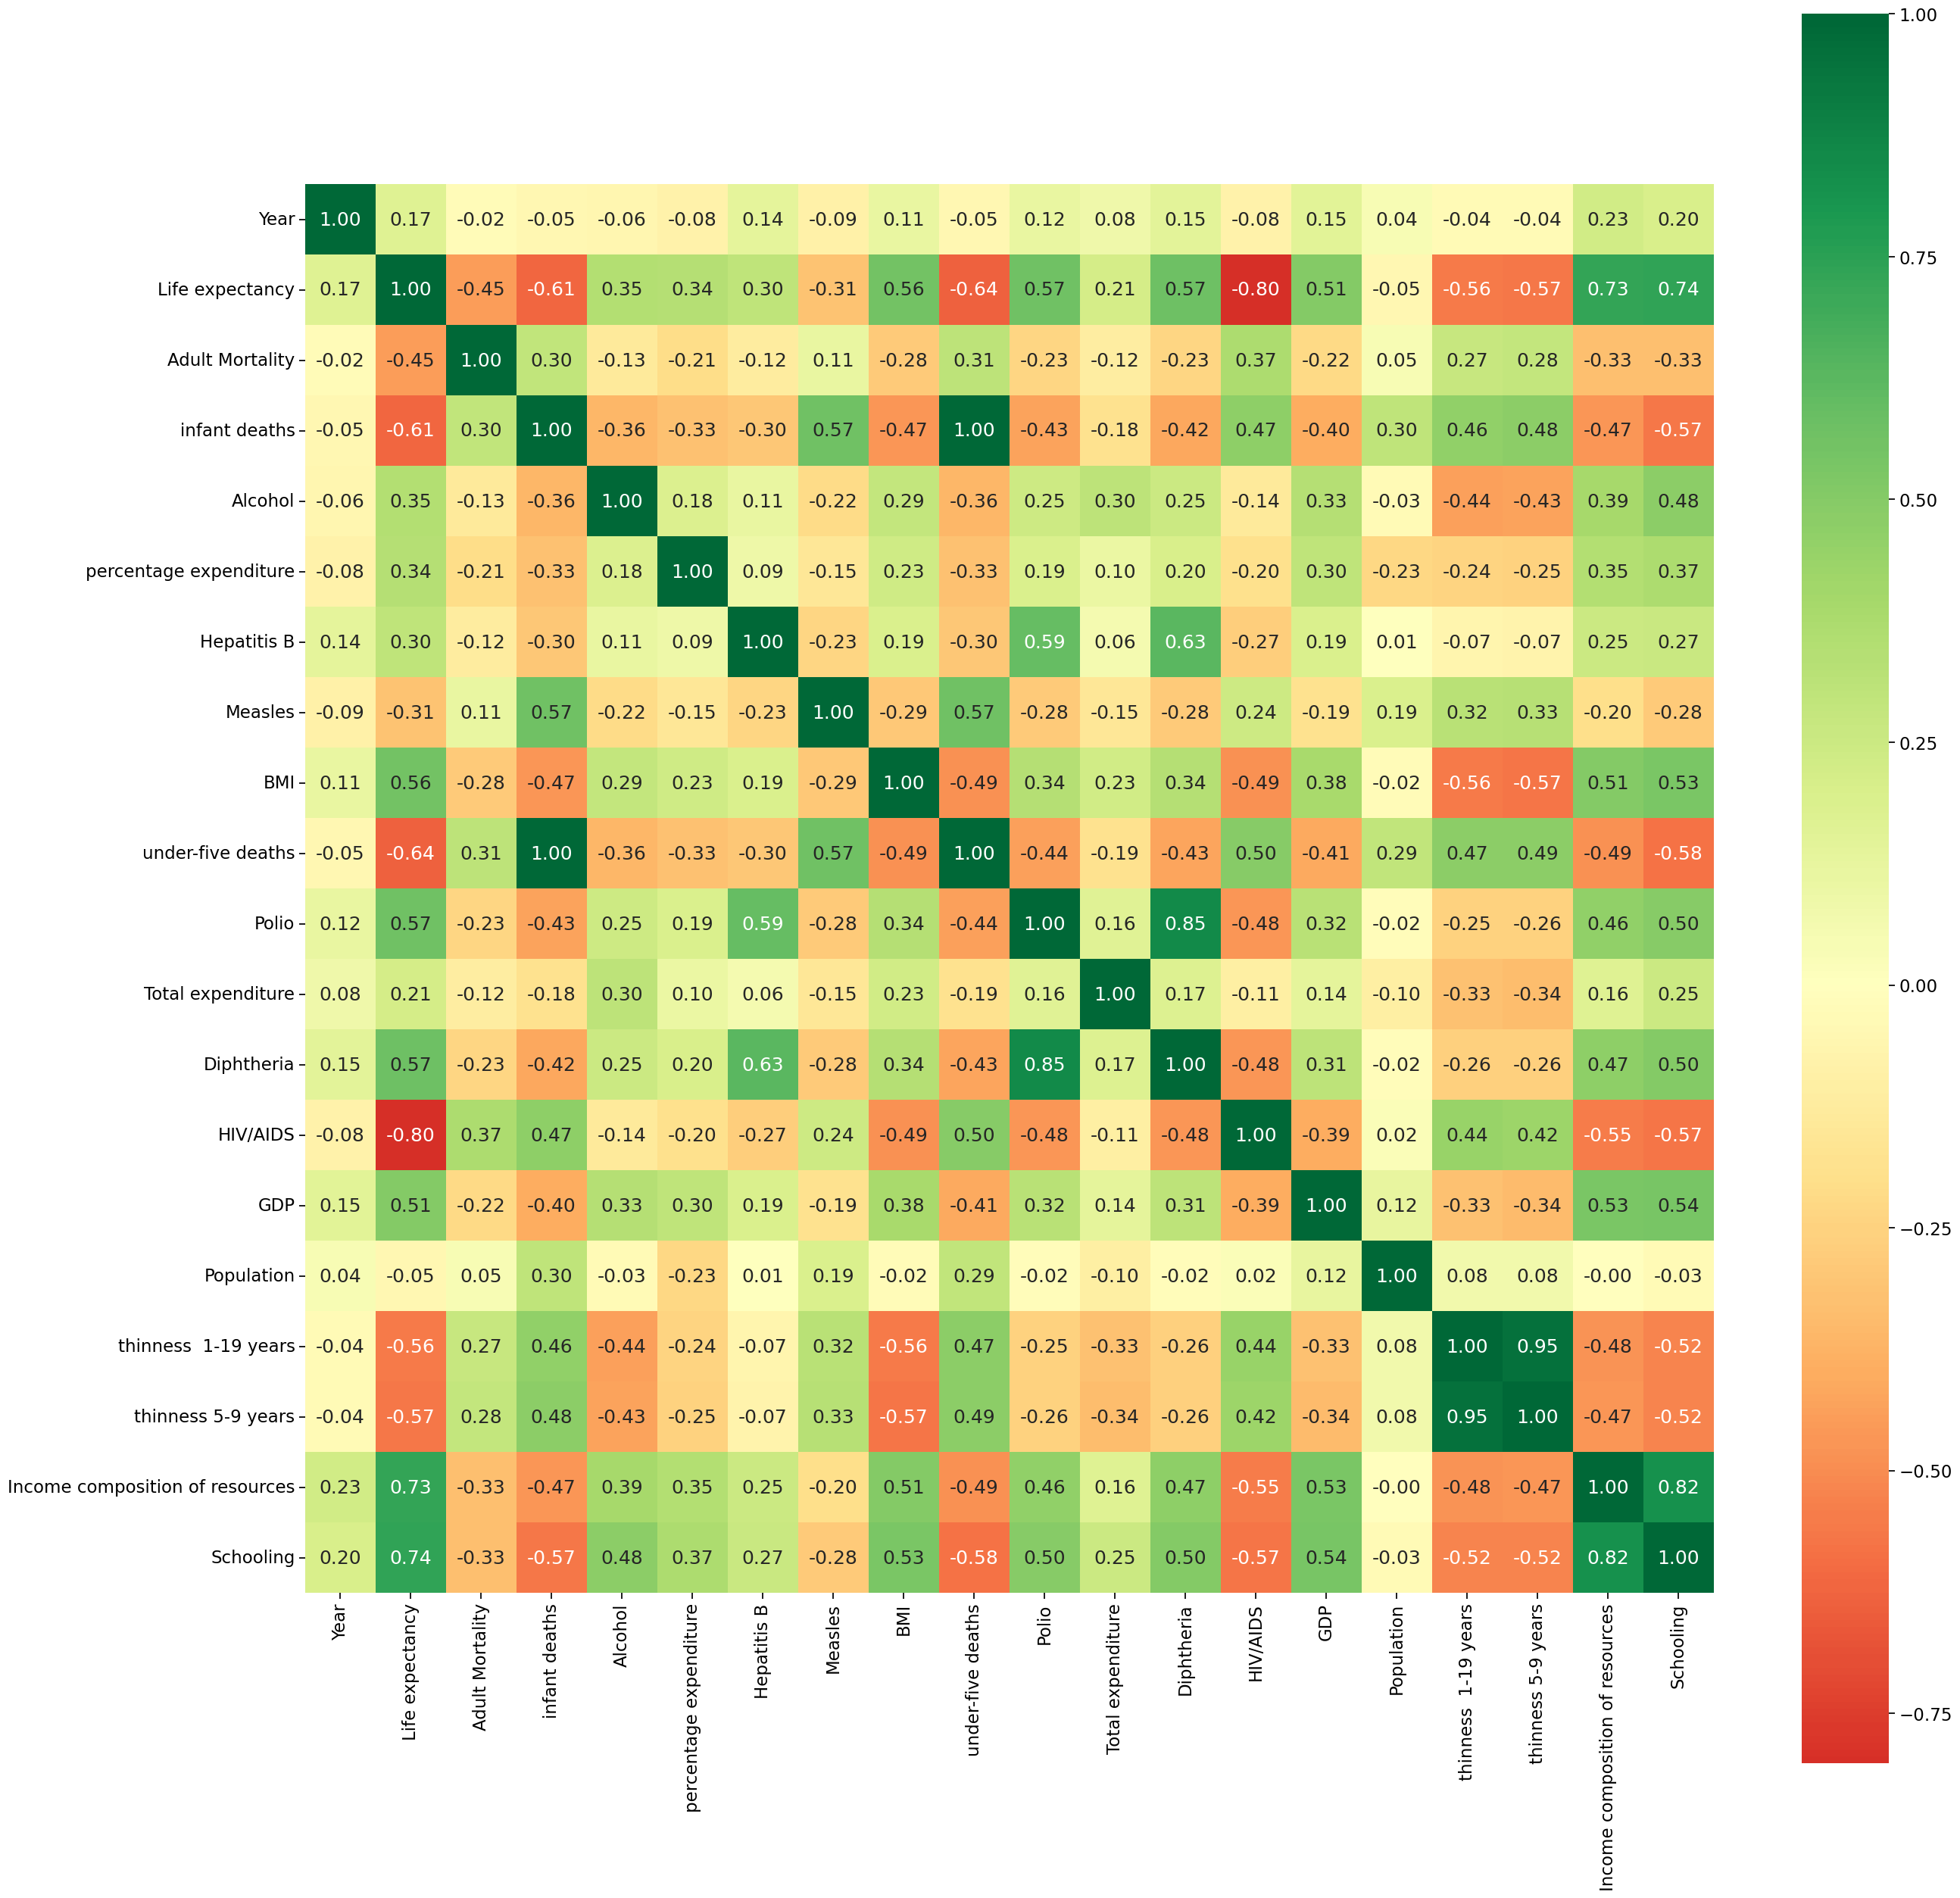

In [415]:
#correlation_matrix = life.corr()
plt.figure(figsize = (30, 30))
# Plot the correlation matrix as a heatmap
sns.heatmap(life.select_dtypes(include = ["float64", "int64"]).corr(), annot=True, cmap='RdYlGn', center=0, square=True, fmt =".2f")

# Observations
## The lower the year the lower the life expectancy
## Under-five deaths and HIV/AIDS causes low Life expectancy
## Increased income composite of resoureces and schooling causes high  level of Life expectancy